In [54]:
#in the following code, a Gaussian Naive Bayes Classifier will be build to predict whether a person makes over 50K a year

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), Python data analysis library
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization; to explore the purpose and target column
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


<h2> Loading the dataset

In [6]:
#import dataset
data = 'C:/Users/evafi/bayes_xml/dataset/adult_income_dataset.csv'
ds = pd.read_csv(data, sep=",")
#top 5 of each column
print(ds.head())

   age  workclass  fnlwgt     education  educational-num      marital-status   
0   25    Private  226802          11th                7       Never-married  \
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss   
0  Machine-op-inspct    Own-child  Black    Male             0             0  \
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [7]:
#numer of rows and columns/ features
ds.shape

(48842, 15)

In [8]:
#rename column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
ds.columns = col_names
ds.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#Overview of the data
ds.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<h2>Preprocessing the data

<h4>Check values in each variable and replace them

In [10]:
col_n = ds.columns
num_data = ds.shape[0]
for c in col_n:
    num_non = ds[c].isin(["?"]).sum()
    if num_non > 0:
        print(c)
        print(num_non)
        print("{0:.2f}%".format(float(num_non) / num_data * 100))

workclass
2799
5.73%
occupation
2809
5.75%
native_country
857
1.75%


In [11]:
# check labels in workclass variable
ds.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
# replace '?' values in workclass variable with `NaN`
ds['workclass'].replace('?', np.NaN, inplace=True)

In [13]:
# replace '?' values in occupation variable with `NaN`
ds['occupation'].replace('?', np.NaN, inplace=True)

In [14]:
# replace '?' values in native_country variable with `NaN`
ds['native_country'].replace('?', np.NaN, inplace=True)

<h4>Dealing with missing values

In [15]:
# Remove all the data that has missing values
ds.isnull().sum()
#missing values in workclass, occupation and native_country

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [16]:
# Remove all the data that has missing values??

<h4> Normalization

In [17]:
# find categorical variables
categorical = [var for var in ds.columns if ds[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [18]:
# check missing values in categorical variables
ds[categorical].isnull().sum()

workclass         2799
education            0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
native_country     857
income               0
dtype: int64

In [19]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(ds[var].value_counts()/np.float(len(ds)))

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: count, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: count, dtype: float64
occupation


C:\Users\evafi\AppData\Local\Temp\ipykernel_8896\404583210.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(ds[var].value_counts()/np.float(len(ds)))
C:\Users\evafi\AppData\Local\Temp\ipykernel_8896\404583210.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(ds[var].value_counts()/np.float(len(ds)))
C:\Users\evafi\AppData

In [20]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(ds[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [21]:
# get numerical variables
numerical = [var for var in ds.columns if ds[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(ds)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_minmax_transform[numerical])
display(features_log_minmax_transform.head(n=5))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.109589,Private,0.145129,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,0.052451,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,0.219649,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,0.100153,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,NaN,0.061708,Some-college,0.600000,Never-married,NaN,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


<h4> Feature Selection

In [23]:
#remove irrelevant features

<h2>Building the Model

<h4>Declare feature vector and target variable

In [24]:
X = ds.drop(['income'], axis=1)

y = ds['income']

<h4> Split data into separate training and test set 

In [25]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((34189, 14), (14653, 14))

<h4> Feature Engineering

In [27]:
# check data types in X_train
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [28]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [29]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [30]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.057211
education         0.000000
marital_status    0.000000
occupation        0.057358
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017608
dtype: float64

In [31]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05721138377840826
occupation 0.05735762964696247
native_country 0.017608002573927285


In [32]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True) 

In [33]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [34]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [35]:
# check missing values in X_train
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [36]:
# check missing values in X_test
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

<h5> Encode categorical variables

In [37]:
# print categorical variables
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
3833,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Own-child,White,Female,United-States
34743,Private,10th,Married-civ-spouse,Craft-repair,Own-child,Other,Male,United-States
2022,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
1580,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
4612,Private,HS-grad,Separated,Transport-moving,Unmarried,White,Female,United-States


In [38]:
# import category encoders
import category_encoders as ce

In [39]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [40]:
#print
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
3833,27,1,0,0,0,0,0,0,0,131310,...,0,0,0,0,0,0,0,0,0,0
34743,42,0,1,0,0,0,0,0,0,367533,...,0,0,0,0,0,0,0,0,0,0
2022,32,0,0,1,0,0,0,0,0,38158,...,0,0,0,0,0,0,0,0,0,0
1580,36,0,1,0,0,0,0,0,0,148903,...,0,0,0,0,0,0,0,0,0,0
4612,29,0,1,0,0,0,0,0,0,359155,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train.shape

(34189, 105)

In [42]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
38113,36,0,1,0,0,0,0,0,0,65624,...,0,0,0,0,0,0,0,0,0,0
39214,57,0,0,0,0,1,0,0,0,37345,...,0,0,0,0,0,0,0,0,0,0
44248,49,0,1,0,0,0,0,0,0,287647,...,0,0,0,0,0,0,0,0,0,0
10283,54,0,0,1,0,0,0,0,0,183668,...,0,0,0,0,0,0,0,0,0,0
26724,17,0,0,1,0,0,0,0,0,228786,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X_test.shape

(14653, 105)

<h4> Feature Scaling

In [44]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.387237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.575857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.25,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.161362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.241033,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.506233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2> Model training

In [45]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

<h2>Predictions and Evaluations

<h4> Predict the results

In [46]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '>50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

<h4> Check accuracy score

In [47]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8057


In [48]:

# compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8072


In [49]:
# Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8072
Test set score: 0.8057


In [48]:
# Compare model accuracy with null accuracy
# check class distribution in test set
y_test.value_counts()

income
<=50K    11138
>50K      3515
Name: count, dtype: int64

In [49]:
# check null accuracy score
##ToDo: stimmt das?
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


<h4> Confusion matrix

In [50]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8992 2146]
 [ 701 2814]]

True Positives(TP) =  8992

True Negatives(TN) =  2814

False Positives(FP) =  2146

False Negatives(FN) =  701


<AxesSubplot:>

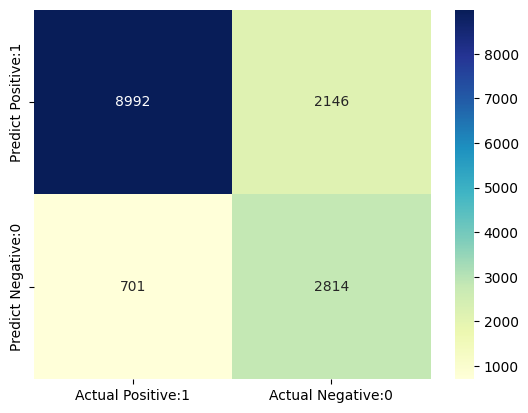

In [51]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<h4> Classification metrices

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86     11138
        >50K       0.57      0.80      0.66      3515

    accuracy                           0.81     14653
   macro avg       0.75      0.80      0.76     14653
weighted avg       0.84      0.81      0.82     14653



In [53]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8057


In [54]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1943


<h4> Class probabilities

In [55]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.86502544e-01, 1.34974559e-02],
       [1.83807577e-06, 9.99998162e-01],
       [2.26527102e-05, 9.99977347e-01],
       [8.75266806e-01, 1.24733194e-01],
       [1.00000000e+00, 3.07127510e-12],
       [9.99995425e-01, 4.57469589e-06],
       [9.99999986e-01, 1.38188108e-08],
       [1.73292146e-07, 9.99999827e-01],
       [1.74329843e-01, 8.25670157e-01],
       [9.99999998e-01, 2.01555043e-09]])

In [56]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.865025e-01,1.349746e-02
1,1.838076e-06,9.999982e-01
2,2.265271e-05,9.999773e-01
3,8.752668e-01,1.247332e-01
4,1.000000e+00,3.071275e-12
5,9.999954e-01,4.574696e-06
6,1.000000e+00,1.381881e-08
7,1.732921e-07,9.999998e-01
8,1.743298e-01,8.256702e-01
9,1.000000e+00,2.015550e-09


In [57]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K
gnb.predict_proba(X_test)[0:10, 1]

array([1.34974559e-02, 9.99998162e-01, 9.99977347e-01, 1.24733194e-01,
       3.07127510e-12, 4.57469589e-06, 1.38188108e-08, 9.99999827e-01,
       8.25670157e-01, 2.01555043e-09])

In [58]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

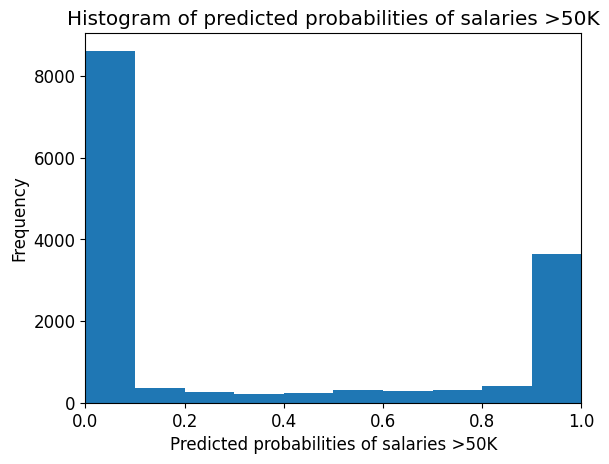

In [59]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

<h2> Interpret ML

<h4> Explore the data

In [50]:
from interpret.data import ClassHistogram
from interpret import show

In [51]:
hist = ClassHistogram().explain_data(X_train, y_train, name="Train Data")
show(hist)

<!-- http://127.0.0.1:7001/1738366413744/ -->

In [52]:
from interpret.glassbox import ExplainableBoostingClassifier

ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier()

In [57]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/1738366187312/ -->

In [58]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7001/1739247156096/ -->

<function matplotlib.pyplot.show(close=None, block=None)>

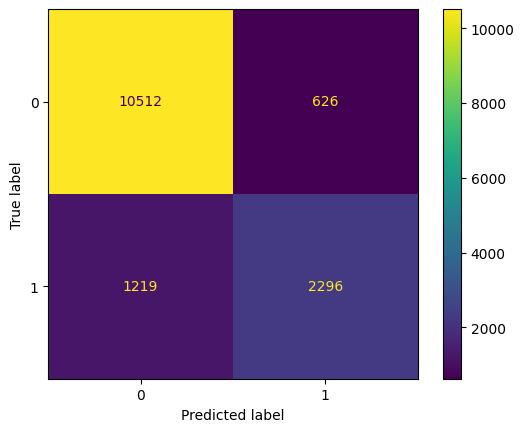

In [55]:
predictions = ebm.predict(X_test)
cm = confusion_matrix(y_test.to_numpy(), predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show

In [59]:
cr = classification_report(y_test.to_numpy(), predictions)
print(cr)

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92     11138
        >50K       0.79      0.65      0.71      3515

    accuracy                           0.87     14653
   macro avg       0.84      0.80      0.82     14653
weighted avg       0.87      0.87      0.87     14653



<h4> Classification report

<h4> Global interpretation

In [ ]:
# inspect the most important features